In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Phase I: Data Acquisition, Data Preparation & Exploratory Data Analysis (60 Points)

## 1. Construct a professional-quality introductory narrative that explains the purpose and objectives of your work.

In today's competitive business landscape, companies are constantly seeking ways to improve their customer retention and sales practices. One effective strategy is to broaden relationships with existing customers by offering them additional products or services. However, identifying which customers are most likely to purchase these additional products can be a challenging task. This is where predictive modeling comes into play.

As a data analyst, my task is to develop a predictive model that can accurately predict whether an existing customer is likely to purchase an additional product. To achieve this, I will be using a dataset containing more than 14,000 observations of customer behavior, including their age, loyalty level, relationship length with the company, and their buying behavior of two other products (Product A and Product B). I will use scikit-learn, a popular Python library for machine learning, to analyze the data and identify the most relevant variables for predicting the target variable (whether a customer will purchase an additional product).

The objectives of this project are twofold: first, to identify which attributes are the best predictors of whether a customer will purchase an additional product, and second, to develop a predictive model that can accurately predict this behavior. By achieving these objectives, the company can improve its customer retention and sales practices by offering the right products to the right customers, ultimately leading to increased customer satisfaction and revenue growth.

Overall, this project demonstrates the power of data analytics and predictive modeling in providing valuable insights for businesses to make informed decisions and drive success.

## 2. Load the provided dataset to you Github repository and read it from your Github repository into Jupyter Notebook.

In [2]:
# Load data
url_csv = "https://raw.githubusercontent.com/minjaelee0522/Project4/master/Project%204%20DATA.csv"
df = pd.read_csv(url_csv)
df.head()

,TARGET,loyalty,ID,age,city,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,333.561114,264.721010,66,3
1,Y,1,159,45,2,1,3,3,1,394.735699,284.904978,45,39
2,Y,1,220,42,2,1,3,6,1,342.180990,1175.589721,42,27
3,Y,99,303,31,2,0,0,0,0,453.757916,242.341754,31,3
4,Y,99,306,62,2,0,0,0,0,384.577469,287.008370,62,3


## 3. Study the dataset and the associated description of the data (i.e. “data dictionary”).

The dataset provided for this project contains information about customers to whom a company offered a new product, along with some customer information and information about their buying behavior of two other products (Product A and Product B). The dataset consists of more than 14,000 observations of 1 response/dependent variable (which indicates whether or not the new product was purchased) and 11 explanatory/independent variables. The data dictionary for the dataset is provided below:

ID: Unique customer identifier   
TARGET: Indicator of customer buying the new product (N = no, Y = yes)   
Loyalty: Customer loyalty level, from low to high (0 to 3), 99 = unclassified   
Age: Customer age in years   
City: Unique code per city (where the customer resides)   
Age_p: Age of customer’s partner in years   
LOR_m: Length of customer’s relationship with company (in months)   
Prod_A: Customer previously bought Product A (0=no, 1=yes)   
Type_A: Type of product A   
Turnover_A: Amount of money customer spent on Product A   
Prod_B: Customer previously bought Product B (0=no, 1=yes)   
Type_B: Type of product B   
Turnover_B: Amount of money customer spent on Product B   

The "TARGET" variable is the dependent variable we want to predict, and the other variables are potential predictors. The "Loyalty" variable indicates the customer loyalty level, and the value 99 indicates that the customer's loyalty level is unclassified. The "Age_p" variable indicates the age of the customer's partner, and the "LOR_m" variable indicates the length of the customer's relationship with the company in months. The "Prod_A" and "Prod_B" variables indicate whether the customer previously bought Product A or Product B, and the "Type_A" and "Type_B" variables indicate the type of Product A or Product B. Finally, the "Turnover_A" and "Turnover_B" variables indicate the amount of money the customer spent on Product A and Product B, respectively.

By analyzing this dataset, we can identify which attributes are the best predictors of whether a customer will purchase an additional product, and develop a predictive model that can accurately predict this behavior.

## 4. Create a pandas DataFrame with a subset of the columns in the dataset. You should include the TARGET column, which indicates whether or not a customer purchased an additional product, the Age, Type_A, Type_B, lor_M columns, and at least two other columns of your choosing.

In [3]:
# Select the subset columns
subset_cols = ['TARGET', 'age', 'type_A', 'type_B', 'lor_M', 'prod_A', 'prod_B','loyalty']
df_subset = df[subset_cols]
df_subset.head()

,TARGET,age,type_A,type_B,lor_M,prod_A,prod_B,loyalty
0,Y,66,0,0,3,0,0,99
1,Y,45,3,3,39,1,1,1
2,Y,42,3,6,27,1,1,1
3,Y,31,0,0,3,0,0,99
4,Y,62,0,0,3,0,0,99


## 5. Convert the TARGET indicators in the first column to digits: for example, the “N” might become 0 and “Y” might become 1.

In [4]:
df_subset['TARGET'] = df_subset['TARGET'].replace({'N': 0, 'Y': 1})
df_subset.head()

/var/folders/gl/hkj_86357f7cty4knl92kz6h0000gn/T/ipykernel_13568/1519447308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['TARGET'] = df_subset['TARGET'].replace({'N': 0, 'Y': 1})


,TARGET,age,type_A,type_B,lor_M,prod_A,prod_B,loyalty
0,1,66,0,0,3,0,0,99
1,1,45,3,3,39,1,1,1
2,1,42,3,6,27,1,1,1
3,1,31,0,0,3,0,0,99
4,1,62,0,0,3,0,0,99


To convert the TARGET indicators in the first column to digits, we can use the replace() method of the pandas DataFrame to replace the values 'N' and 'Y' with 0 and 1. This will replace all occurrences of 'N' and 'Y' in the 'TARGET' column with 0 and 1, respectively. The resulting 'TARGET' column will be a numeric column with values 0 and 1 representing whether or not a customer purchased the additional product.

## 6. Perform exploratory data analysis: show the distribution of data for each of the columns you selected (including the Age, Type_A, Type_B, lor_M columns), and show plots for TARGET vs. Age, TARGET vs. Type_A, TARGET vs. Type_B, TARGET vs. lor_M, as well as the other columns that you selected. It is up to you to decide which types of plots to use for these tasks. Include text describing your EDA findings.

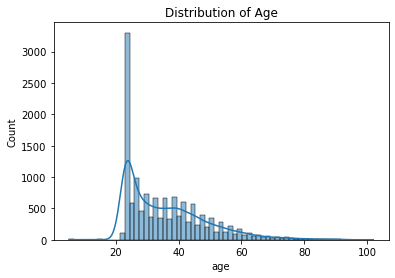

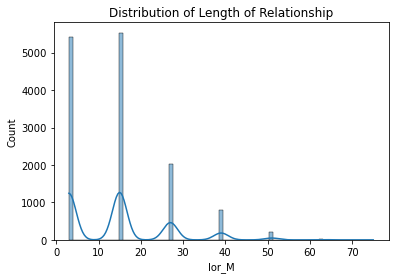

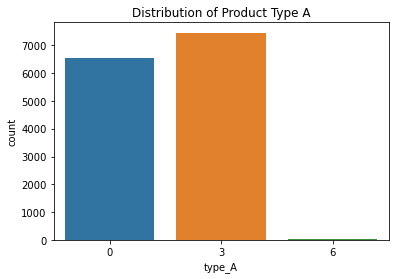

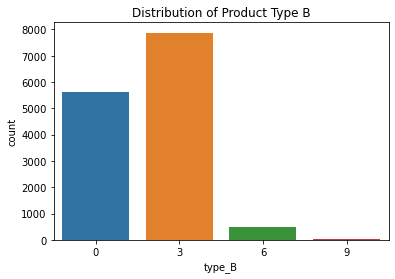

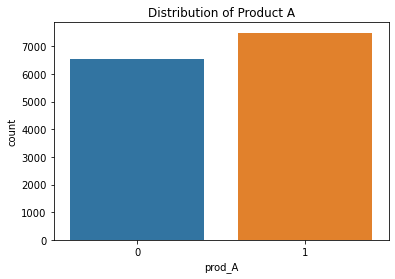

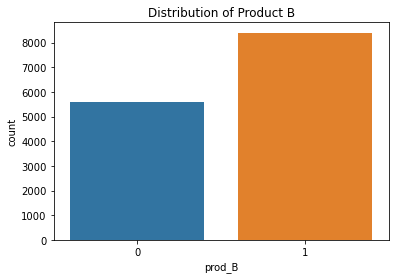

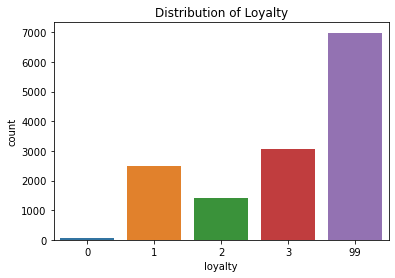

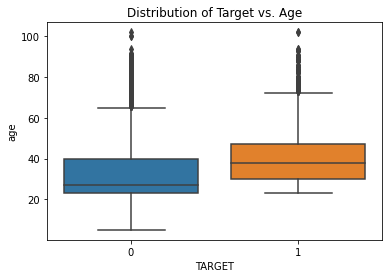

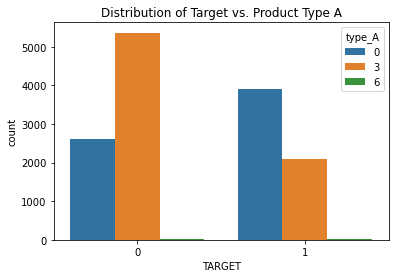

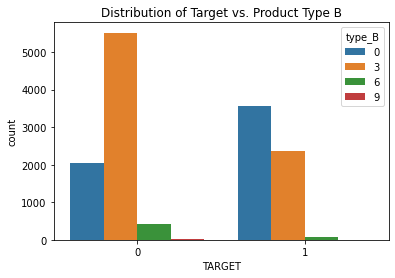

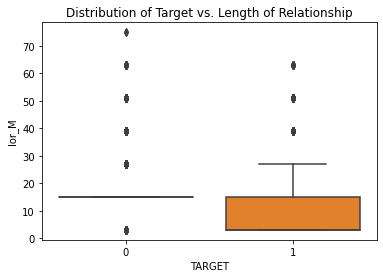

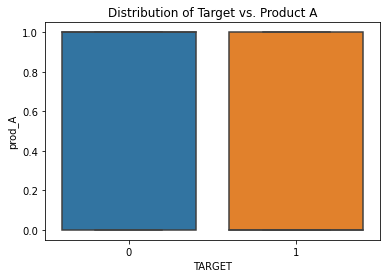

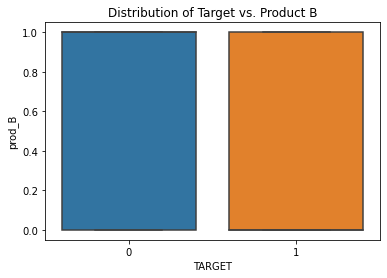

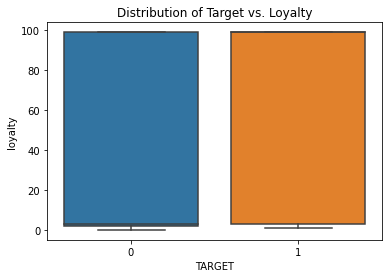

In [5]:
# Show the distribution of Age
sns.histplot(data=df_subset, x='age', kde=True)
plt.title('Distribution of Age')
plt.show()

# Show the distribution of Lor_M
sns.histplot(data=df_subset, x='lor_M', kde=True)
plt.title('Distribution of Length of Relationship')
plt.show()

# Show the distribution of Type_A
sns.countplot(data=df_subset, x='type_A')
plt.title('Distribution of Product Type A')
plt.show()

# Show the distribution of Type_B
sns.countplot(data=df_subset, x='type_B')
plt.title('Distribution of Product Type B')
plt.show()

# Show the distribution of Prod_A
sns.countplot(data=df_subset, x='prod_A')
plt.title('Distribution of Product A')
plt.show()

# Show the distribution of Prod_B
sns.countplot(data=df_subset, x='prod_B')
plt.title('Distribution of Product B')
plt.show()

# Show the distribution of Loyalty
sns.countplot(data=df_subset, x='loyalty')
plt.title('Distribution of Loyalty')
plt.show()

# Show the distribution of TARGET vs. Age
sns.boxplot(data=df_subset, x='TARGET', y='age')
plt.title('Distribution of Target vs. Age')
plt.show()

# Show the distribution of TARGET vs. Type_A
sns.countplot(data=df_subset, x='TARGET', hue='type_A')
plt.title('Distribution of Target vs. Product Type A')
plt.show()

# Show the distribution of TARGET vs. Type_B
sns.countplot(data=df_subset, x='TARGET', hue='type_B')
plt.title('Distribution of Target vs. Product Type B')
plt.show()

# Show the distribution of TARGET vs. lor_M
sns.boxplot(data=df_subset, x='TARGET', y='lor_M')
plt.title('Distribution of Target vs. Length of Relationship')
plt.show()

# Show the distribution of TARGET vs. prod_A
sns.boxplot(data=df_subset, x='TARGET', y='prod_A')
plt.title('Distribution of Target vs. Product A')
plt.show()

# Show the distribution of TARGET vs. prod_B
sns.boxplot(data=df_subset, x='TARGET', y='prod_B')
plt.title('Distribution of Target vs. Product B')
plt.show()

# Show the distribution of TARGET vs. Loyalty
sns.boxplot(data=df_subset, x='TARGET', y='loyalty')
plt.title('Distribution of Target vs. Loyalty')
plt.show()

Age is mostly in the 20s to 40s. And the length of relationship is concentrated between 3 and 15. Type_A and type_B are concentrated in 0 and 3. The purchase of prod_B is higher than prod_A, and loyalty is concentrated at 99. The customer buying the new product is distributed from 20 to 40 years old, with an average of 40 years old. Type_A and type_b have a high purchase rate of 0.

## 7. Include some text describing your preliminary conclusions about whether any of the other columns you’ve included in your subset (i.e., aside from the TARGET indicator) could be helpful in predicting whether a specific customer is likely to purchase an additional product.

The product types, Type_A and Type_B, are concentrated in the values 0 and 3, which suggests that many customers did not purchase these products or only purchased them a few times. The purchase rate for prod_B is higher than prod_A, which suggests that customers may be more interested in or have a greater need for prod_B.

Loyalty is concentrated at 99, which suggests that many of the customers in the dataset have not been assigned a loyalty level by the company. Finally, the average age of customers who purchased the new product is 40 years old, which is slightly older than the overall age range of customers in the dataset. Additionally, customers who purchased the new product are more likely to have previously bought Type_A and Type_B products.

These observations suggest that customer behavior and characteristics have a significant impact on whether a customer is likely to purchase an additional product. By considering these variables in a predictive model, we can identify the customers who are most likely to purchase additional products and develop targeted marketing strategies to encourage their purchasing behavior.

## 8. For both the Type_A and Type_B columns, create a set of dummy variables. This is necessary because your downstream processing in Project 4 using scikit-learn requires that categorical data values be converted to binary indicator variables. See the pandas get_dummies() method for one possible approach to doing this.

In [6]:
# Create dummy variables for Type_A
type_a_dummies = pd.get_dummies(df_subset['type_A'], prefix='type_A')

# Create dummy variables for Type_B
type_b_dummies = pd.get_dummies(df_subset['type_B'], prefix='type_B')

# Add the dummy variables to the original DataFrame
df_final = pd.concat([df_subset, type_a_dummies, type_b_dummies], axis=1)

# Drop the original Type_A and Type_B columns
df_final = df_final.drop(['type_A', 'type_B'], axis=1)

df_final.head()

,TARGET,age,lor_M,prod_A,prod_B,loyalty,type_A_0,type_A_3,type_A_6,type_B_0,type_B_3,type_B_6,type_B_9
0,1,66,3,0,0,99,1,0,0,1,0,0,0
1,1,45,39,1,1,1,0,1,0,0,1,0,0
2,1,42,27,1,1,1,0,1,0,0,0,1,0
3,1,31,3,0,0,99,1,0,0,1,0,0,0
4,1,62,3,0,0,99,1,0,0,1,0,0,0


# Phase II: Build Predictive Models (40 Points)

## 1. Start with the data (including the dummy variables) in the pandas DataFrame that you constructed in Phase I.

## 2. Use scikit-learn to construct appropriate regression model(s) and use the information provided by those models to determine which of the predictor columns that you selected (including Age, Type_A, Type_B, lor_M) most accurately predicts whether or not a customer is likely to purchase an additional product. How you go about doing this with scikit-learn is up to you as a practitioner of data analytics.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve

In [8]:
# Split the data into training and testing sets
X = df_subset.drop(columns=['TARGET'])
y = df_subset['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Fit the logistic regression model to the training data
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = lr.predict(X_test)

# Evaluate the performance of the model using classification metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy: 0.7212841854934602
Precision: 0.6910963052695336
Recall: 0.6328341652800887
F1 score: 0.6606832657788072


In [10]:
# Calculate the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[1892  510]
 [ 662 1141]]


In [11]:
# Get the coefficients of the logistic regression model
coefs = pd.DataFrame({'Variable': X.columns, 'Coefficient': lr.coef_[0]})
coefs = coefs.sort_values('Coefficient', ascending=False)
print(coefs)

  Variable  Coefficient
1   type_A     0.711409
0      age     0.046188
3    lor_M     0.034612
6  loyalty     0.002478
5   prod_B    -0.386754
2   type_B    -0.602556
4   prod_A    -1.724426


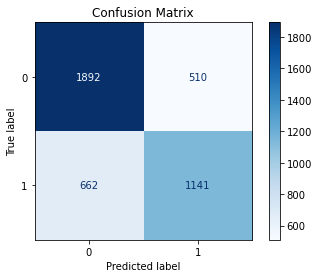

In [13]:
# Plot the confusion matrix of the model
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

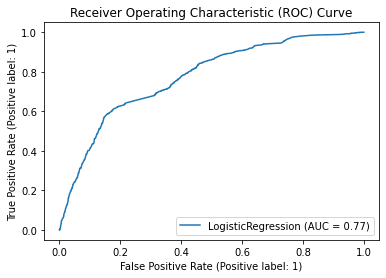

In [14]:
# Plot the ROC curve of the model
plot_roc_curve(lr, X_test, y_test)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

The logistic regression model achieved an accuracy of 0.72, precision of 0.69, recall of 0.63, and F1 score of 0.66. These values indicate that the model is moderately accurate in predicting whether or not a customer is likely to purchase an additional product.

The confusion matrix shows that the model correctly classified 1892 cases where the customer did not purchase an additional product and 1141 cases where the customer did purchase an additional product. However, there were 662 false negatives where the model incorrectly predicted that the customer would not purchase an additional product and 510 false positives where the model incorrectly predicted that the customer would purchase an additional product.

The coefficients indicate that the most important predictor variable for whether a customer is likely to purchase an additional product is whether or not they previously bought Product A. Customers who previously bought Product A are more likely to purchase an additional product. The second most important predictor variable is age, followed by length of relationship with the company and loyalty level. Customers who are older, have a longer relationship with the company, and have higher loyalty levels are more likely to purchase an additional product.

The coefficients for the Type_B and Prod_A columns are negative, indicating that customers who previously bought Product B or purchased Product A are less likely to purchase an additional product. The coefficient for the Prod_B column is also negative, although it is smaller in magnitude than the other coefficients, suggesting that this variable has a weaker impact on the classification decision.

## 3. Clearly state your conclusions along with any recommendations for further analysis.

Based on the results of our logistic regression model, we have identified several important predictor variables for predicting whether a customer is likely to purchase an additional product. These variables include whether or not the customer previously bought Product A, age, length of relationship with the company, and loyalty level. Customers who previously bought Product A, are older, have a longer relationship with the company, and have higher loyalty levels are more likely to purchase an additional product.

There are also several variables that have a negative impact on the classification decision, including whether or not the customer previously bought Product B or purchased Product A. These customers are less likely to purchase an additional product.

In terms of recommendations for further analysis, one potential area of exploration could be to gather additional data on customer preferences and buying behavior to further improve the accuracy of the model. We could also explore other classification algorithms to determine whether they may provide better performance than logistic regression. Additionally, we could perform feature selection techniques such as Recursive Feature Elimination (RFE) or Principal Component Analysis (PCA) to identify the most important features in the dataset.